In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv(r"C:\Users\21650\Downloads\elden_ring_weapon.csv")

In [40]:
pd.set_option("display.Max_Columns",df.shape[1])
df.head(10)

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,-,S,-,-,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,D,D,-,-,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,D,-,-,-,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,-,B,-,S,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,C,-,-,-,(55),47,31,31,31,31,25,10,3.0,Smithing Stones
5,Arbalest,Crossbow,308,-,-,-,-,100,68,-,-,-,-,-,-,-,-,-,-,-,-,-,6.0,Smithing Stones
6,Astrologer's Staff,Glintstone Staff,43,-,-,-,-,100,40,D,-,S,-,-,-,25,15,15,15,15,15,10,3.0,Smithing Stones
7,Axe of Godfrey,Colossal Weapon,404,-,-,-,-,100,150,C,D,-,-,-,-,75,45,45,45,45,50,25,18.0,Somber Smithing Stones
8,Axe of Godrick,Greataxe,347,-,-,-,-,100,150,C,C,-,-,-,-,65,35,35,35,35,42,20,11.0,Somber Smithing Stones
9,Azur's Glintstone Staff,Glintstone Staff,58,-,-,-,-,100,42,C,-,S,-,-,-,25,15,15,15,15,15,10,4.0,Somber Smithing Stones


In [41]:
df.shape

(307, 24)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     307 non-null    object 
 1   Type     307 non-null    object 
 2   Phy      307 non-null    object 
 3   Mag      307 non-null    object 
 4   Fir      307 non-null    object 
 5   Lit      307 non-null    object 
 6   Hol      307 non-null    object 
 7   Cri      307 non-null    int64  
 8   Sta      307 non-null    int64  
 9   Str      307 non-null    object 
 10  Dex      307 non-null    object 
 11  Int      307 non-null    object 
 12  Fai      307 non-null    object 
 13  Arc      307 non-null    object 
 14  Any      307 non-null    object 
 15  Phy.1    307 non-null    object 
 16  Mag.1    307 non-null    object 
 17  Fir.1    307 non-null    object 
 18  Lit.1    307 non-null    object 
 19  Hol.1    307 non-null    object 
 20  Bst      307 non-null    object 
 21  Rst      307 non

In [43]:
cols=["Phy", "Mag", "Lit", "Fir", "Hol","Any","Phy.1", "Mag.1", "Lit.1", "Fir.1", "Hol.1","Bst","Rst"]
df[cols] = df[cols].replace('-', '0')
df[cols] = df[cols].applymap(lambda x: str(x).strip().replace('(', '').replace(')', ''))
df[cols]=df[cols].astype("int")

C:\Users\21650\AppData\Local\Temp\ipykernel_2016\3500751396.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: str(x).strip().replace('(', '').replace(')', ''))


In [44]:
new_cols=["Str","Dex","Int","Fai","Arc"]
df[new_cols]=df[new_cols].replace("-","None")

In [45]:
df.sort_values(by="Cri",ascending=False).head(10)

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
195,Misericorde,Dagger,225,0,0,0,0,140,56,E,C,None,None,None,0,36,21,21,21,21,18,10,2.0,Smithing Stones
66,Dagger,Dagger,181,0,0,0,0,130,60,D,B,None,None,None,0,35,20,20,20,20,18,10,1.5,Smithing Stones
222,Rapier,Thrusting Sword,235,0,0,0,0,130,60,D,B,None,None,None,0,45,30,30,30,30,24,10,2.5,Smithing Stones
139,Great epee,Heavy Thrusting Sword,303,0,0,0,0,124,94,D,C,None,None,None,0,52,36,36,36,36,37,15,6.5,Smithing Stones
90,Executioner's Greataxe,Greataxe,367,0,0,0,0,115,172,B,E,None,None,None,0,74,40,40,40,40,57,23,15.0,Smithing Stones
22,Black Knife,Dagger,161,0,0,0,159,110,56,E,B,None,C,None,0,26,15,15,15,42,15,10,2.0,Somber Smithing Stones
23,Blade of Calling,Dagger,173,0,0,0,105,110,56,D,C,None,B,None,0,31,18,18,18,30,15,10,1.5,Somber Smithing Stones
68,Death Ritual Spear,Spear,242,156,0,0,0,110,84,D,B,D,None,None,0,54,42,27,27,27,36,18,6.5,Somber Smithing Stones
25,Bloodhound Claws,Claw,230,0,0,0,0,110,78,C,D,None,None,None,60,38,22,22,22,22,26,11,3.0,Smithing Stones
27,Bloodstained Dagger,Dagger,198,0,0,0,0,110,60,B,D,None,None,None,38,36,21,21,21,21,18,10,2.0,Smithing Stones


C:\Users\21650\AppData\Local\Temp\ipykernel_2016\1860811784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x="Type",palette='viridis')


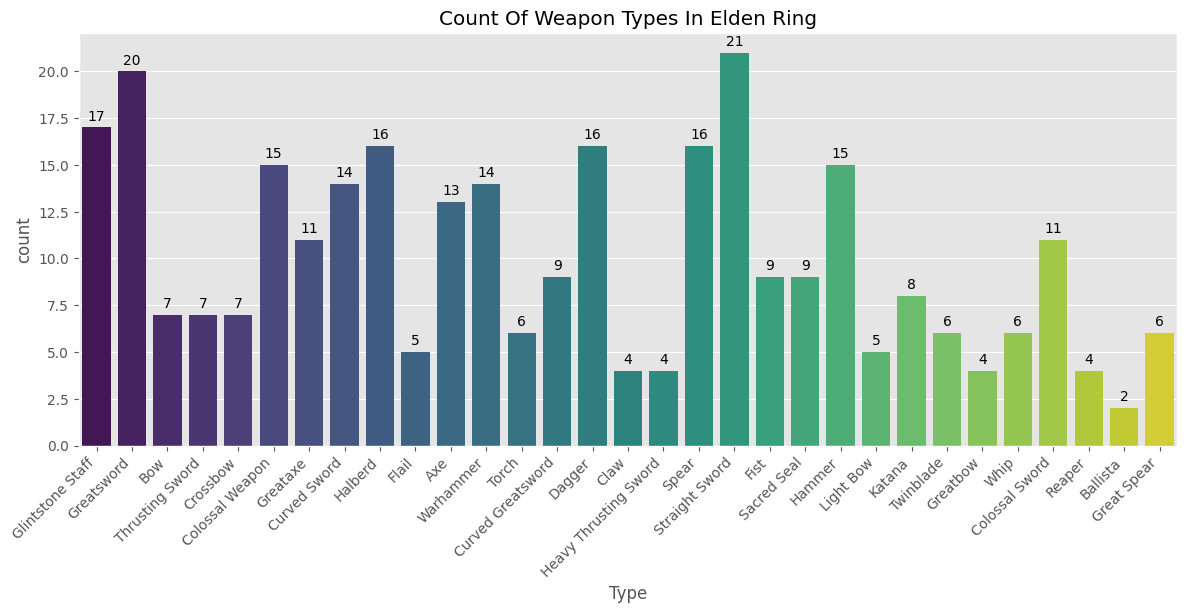

In [46]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x="Type",palette='viridis')
plt.xticks(rotation=45,ha='right')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()
plt.title("Count Of Weapon Types In Elden Ring")
plt.show()

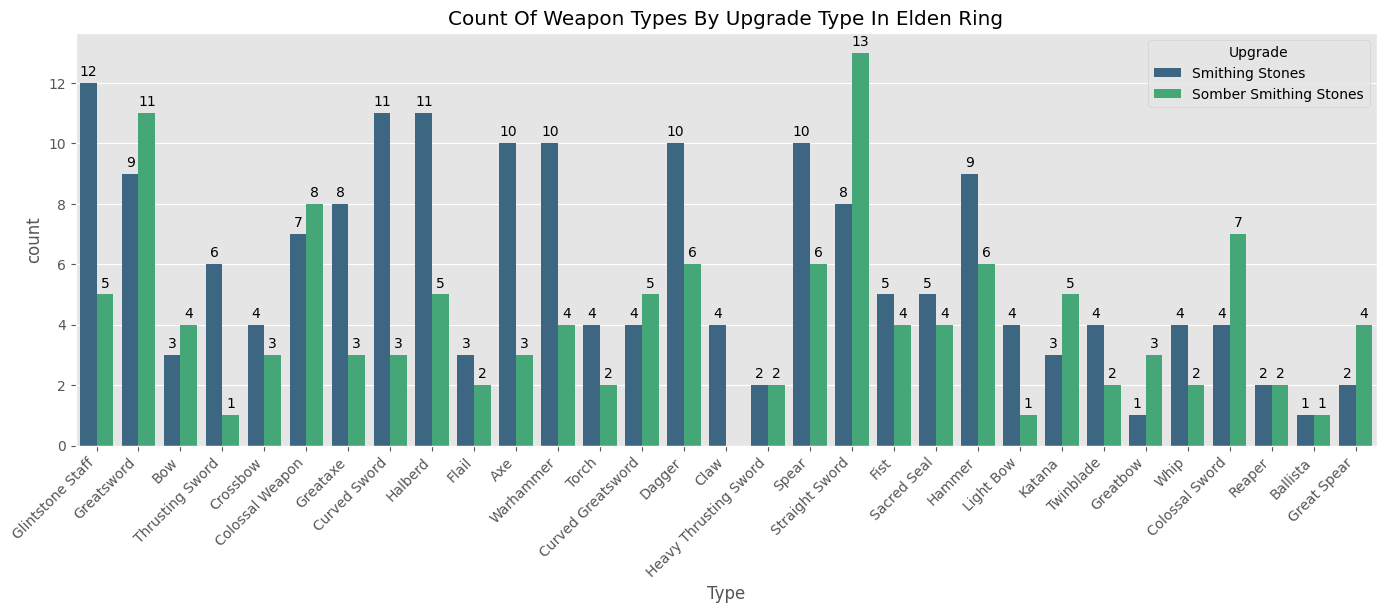

In [47]:
plt.figure(figsize=(14,6))
ax=sns.countplot(data=df,x="Type",hue="Upgrade",palette='viridis')
plt.xticks(rotation=45,ha='right')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()
plt.title("Count Of Weapon Types By Upgrade Type In Elden Ring")
plt.show()

C:\Users\21650\AppData\Local\Temp\ipykernel_2016\3446693558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(data=df.sort_values(by="Phy",ascending=False)[:10],x="Name",y="Phy",palette='coolwarm',ax=axs[0,0])
C:\Users\21650\AppData\Local\Temp\ipykernel_2016\3446693558.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(data=df.sort_values(by="Mag",ascending=False)[:10],x="Name",y="Mag",palette='coolwarm',ax=axs[0,1])
C:\Users\21650\AppData\Local\Temp\ipykernel_2016\3446693558.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3=sns.barplo

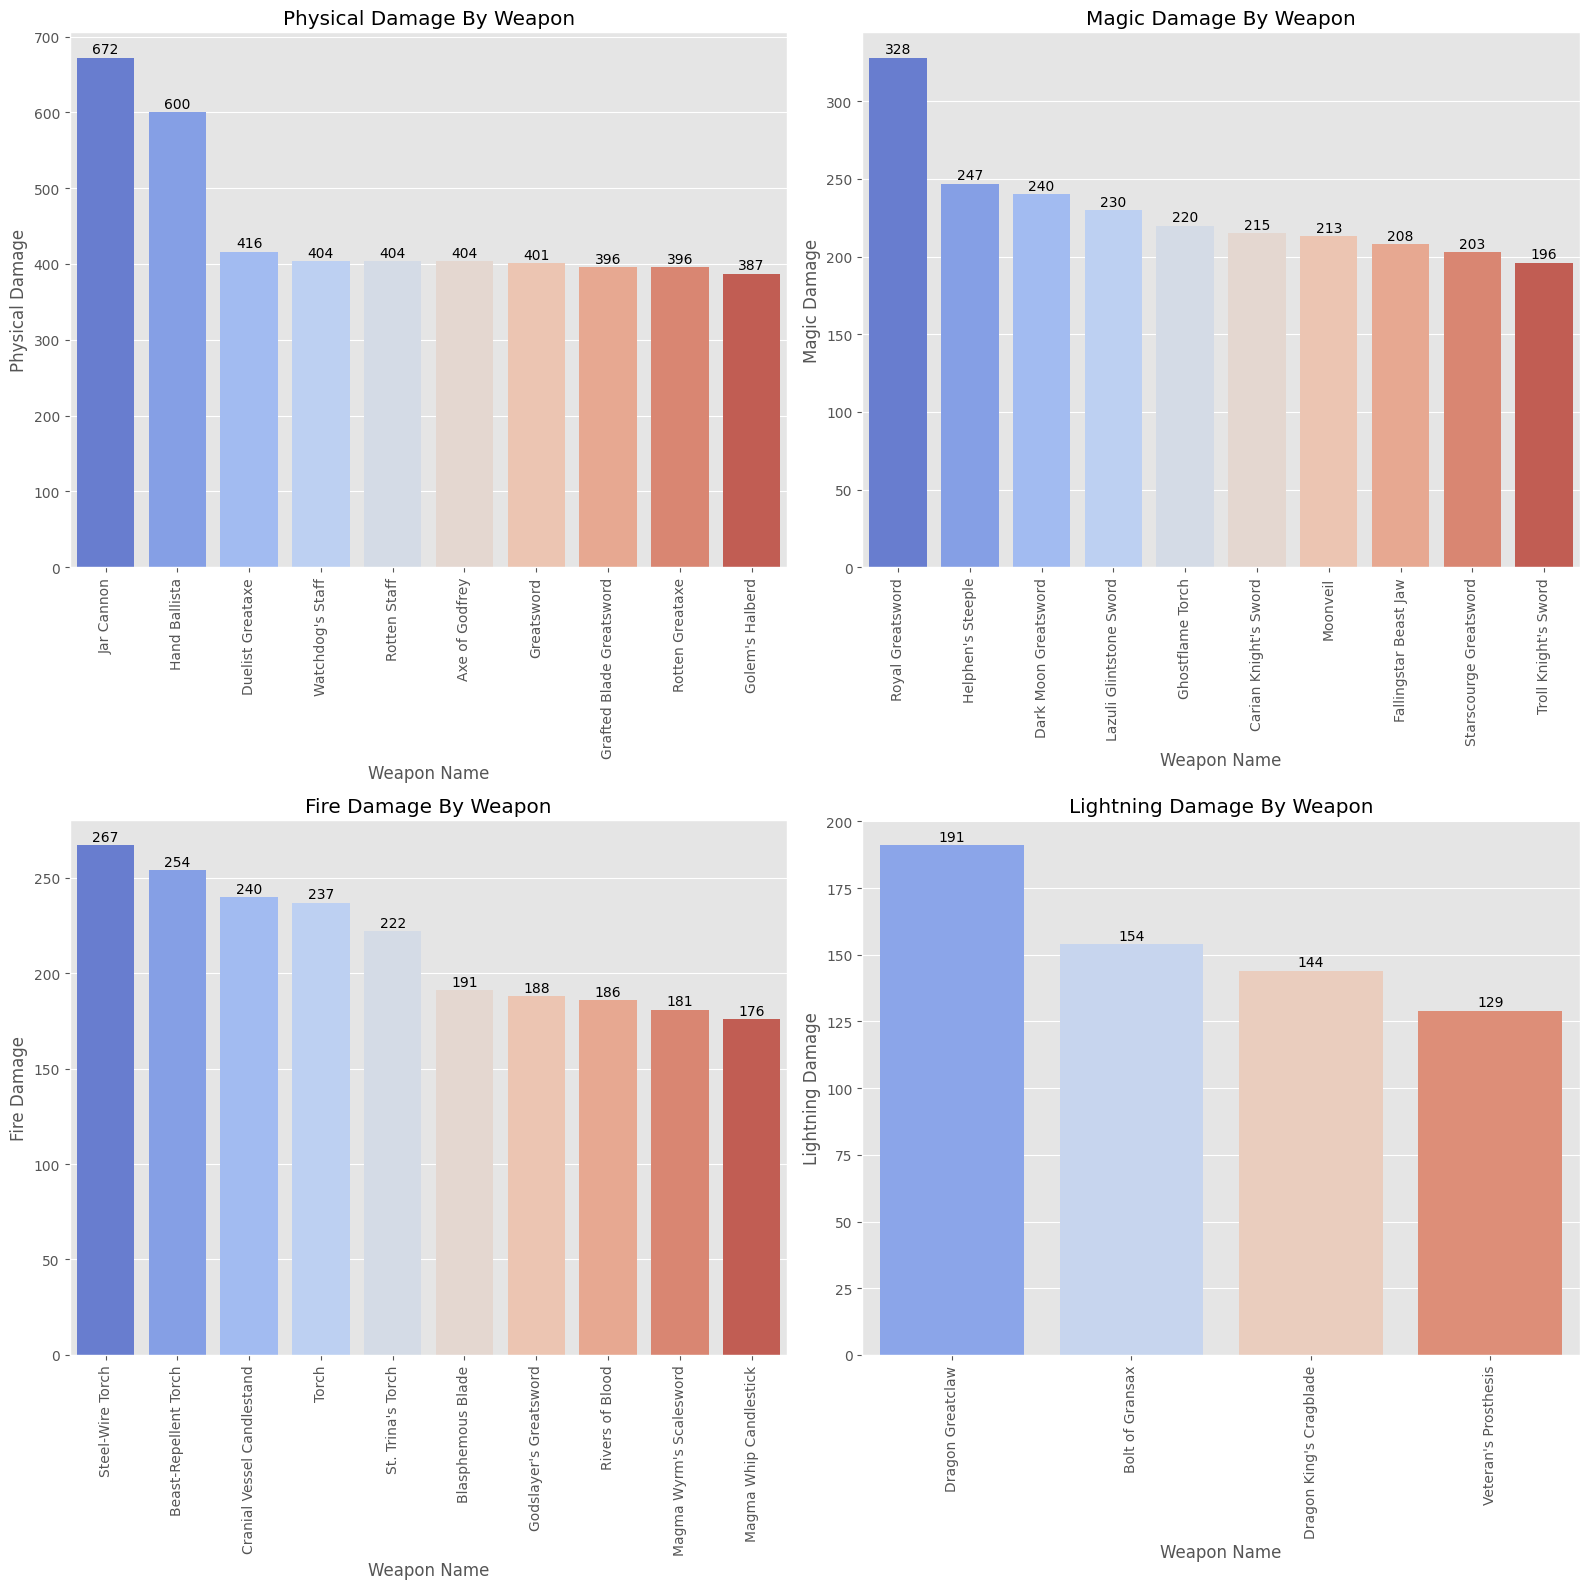

In [48]:

fig,axs =plt.subplots(ncols=2,nrows=2,figsize=(16,16))
ax1=sns.barplot(data=df.sort_values(by="Phy",ascending=False)[:10],x="Name",y="Phy",palette='coolwarm',ax=axs[0,0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=1)
ax1.set_xlabel("Weapon Name")
ax1.set_ylabel("Physical Damage")
ax1.set_title("Physical Damage By Weapon")
ax1.tick_params('x',rotation=90)
ax2=sns.barplot(data=df.sort_values(by="Mag",ascending=False)[:10],x="Name",y="Mag",palette='coolwarm',ax=axs[0,1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=1)
ax2.set_xlabel("Weapon Name")
ax2.set_ylabel("Magic Damage")
ax2.set_title("Magic Damage By Weapon")
ax2.tick_params('x',rotation=90)
ax3=sns.barplot(data=df.sort_values(by="Fir",ascending=False)[:10],x="Name",y="Fir",palette='coolwarm',ax=axs[1,0])
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', padding=1)
ax3.set_xlabel("Weapon Name")
ax3.set_ylabel("Fire Damage")
ax3.set_title("Fire Damage By Weapon")
ax3.tick_params('x',rotation=90)
ax4=sns.barplot(data=df.sort_values(by="Lit",ascending=False)[:4],x="Name",y="Lit",palette='coolwarm',ax=axs[1,1])
for container in ax4.containers:
    plt.bar_label(container, fmt='%d', label_type='edge', padding=1)
ax4.set_xlabel("Weapon Name")
ax4.set_ylabel("Lightning Damage")
ax4.set_title("Lightning Damage By Weapon")
ax4.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [49]:
grouped_df=df.groupby(["Type","Upgrade"])[cols].agg({"mean"},{"count"})

In [50]:
pd.set_option("display.Max_Rows",1000)
grouped_df.applymap(lambda x: '-' if int(x)==0 else int(x))

C:\Users\21650\AppData\Local\Temp\ipykernel_2016\302046274.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grouped_df.applymap(lambda x: '-' if int(x)==0 else int(x))


Phy  Mag  Lit  Fir  Hol  Any  \
                                             mean mean mean mean mean mean   
Type                  Upgrade                                                
Axe                   Smithing Stones         278    -    -    -    -    5   
                      Somber Smithing Stones  282   55    -    -    -   21   
Ballista              Smithing Stones         600    -    -    -    -    -   
                      Somber Smithing Stones  672    -    -    -    -    -   
Bow                   Smithing Stones         185   24    -    -    -    -   
                      Somber Smithing Stones  160    -    -    -   30    -   
Claw                  Smithing Stones         219    -    -    -    -   63   
Colossal Sword        Smithing Stones         368    -    -    -    -    -   
                      Somber Smithing Stones  313  116    -   26   28    -   
Colossal Weapon       Smithing Stones         387    -    -   15    -    9   
                      Somber Smithing Stones  347   26   23    -   46   18   
Crossbow              Smithing Stones         274    -    -    -    -    -   
                      Somber Smithing Stones  186   58    -    -    -    -   
Curved Greatsword     Smithing Stones         340    -    -    -    -    -   
                      Somber Smithing Stones  302   37    -   36    -   36   
Curved Sword          Smithing Stones         267    -    -    -    -    4   
                      Somber Smithing Stones  194   63    -   50   62    -   
Dagger                Smithing Stones         190   27    -    -    -   11   
                      Somber Smithing Stones  183   27    -    -   44   16   
Fist                  Smithing Stones         236    -    -    -    -   18   
                      Somber Smithing Stones  154   14   32   34   52    -   
Flail                 Smithing Stones         269    -    -    -    -   50   
                      Somber Smithing Stones  186  164    -    -    -    -   
Glintstone Staff      Smithing Stones          46    -    -    -    -    3   
                      Somber Smithing Stones   70    -    -    -    -   10   
Great Spear           Smithing Stones         299    -    -    -   96    -   
                      Somber Smithing Stones  244    -    -   78   55   30   
Greataxe              Smithing Stones         348    -    -    -    -    6   
                      Somber Smithing Stones  303    -    -    -   98    -   
Greatbow              Smithing Stones         306    -    -    -    -    -   
                      Somber Smithing Stones  253    -    -    -   53    -   
Greatsword            Smithing Stones         334    -    -    -    -   12   
                      Somber Smithing Stones  267   74    -   17   82   15   
Halberd               Smithing Stones         301    -    -    -    -    5   
                      Somber Smithing Stones  303   34    -    -  102    -   
Hammer                Smithing Stones         283    -    -    -    -   11   
                      Somber Smithing Stones  238   26    -    -   51   10   
Heavy Thrusting Sword Smithing Stones         307    -    -    -    -    -   
                      Somber Smithing Stones  260    -   72    -    -   27   
Katana                Smithing Stones         285    -    -    -    -   52   
                      Somber Smithing Stones  238   77    -   37    -   40   
Light Bow             Smithing Stones         160    -    -    -    -    -   
                      Somber Smithing Stones  151    -    -    -    -    -   
Reaper                Smithing Stones         329    -    -    -    -   55   
                      Somber Smithing Stones  251    -    -    -  220   55   
Sacred Seal           Smithing Stones          45    -    -    -    -    -   
                      Somber Smithing Stones   60    -    -    -    9   13   
Spear                 Smithing Stones         276   15    -    7    -   10   
                      Somber Smithing Stones  250   51   25   26   2

<Axes: xlabel='Wgt', ylabel='Phy'>

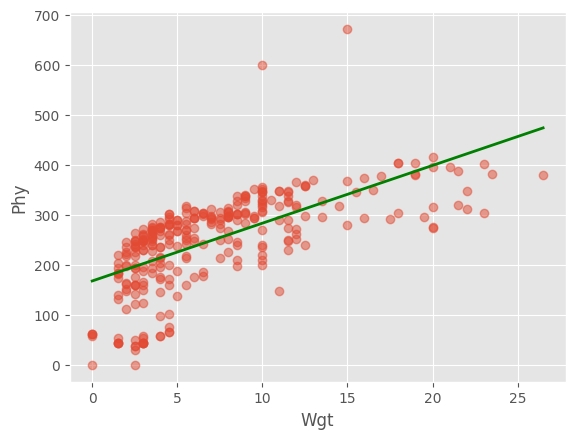

In [51]:
sns.regplot(data=df,x="Wgt",y="Phy",ci=False,line_kws={"color":"green","linewidth":2},scatter_kws={"alpha":.5})

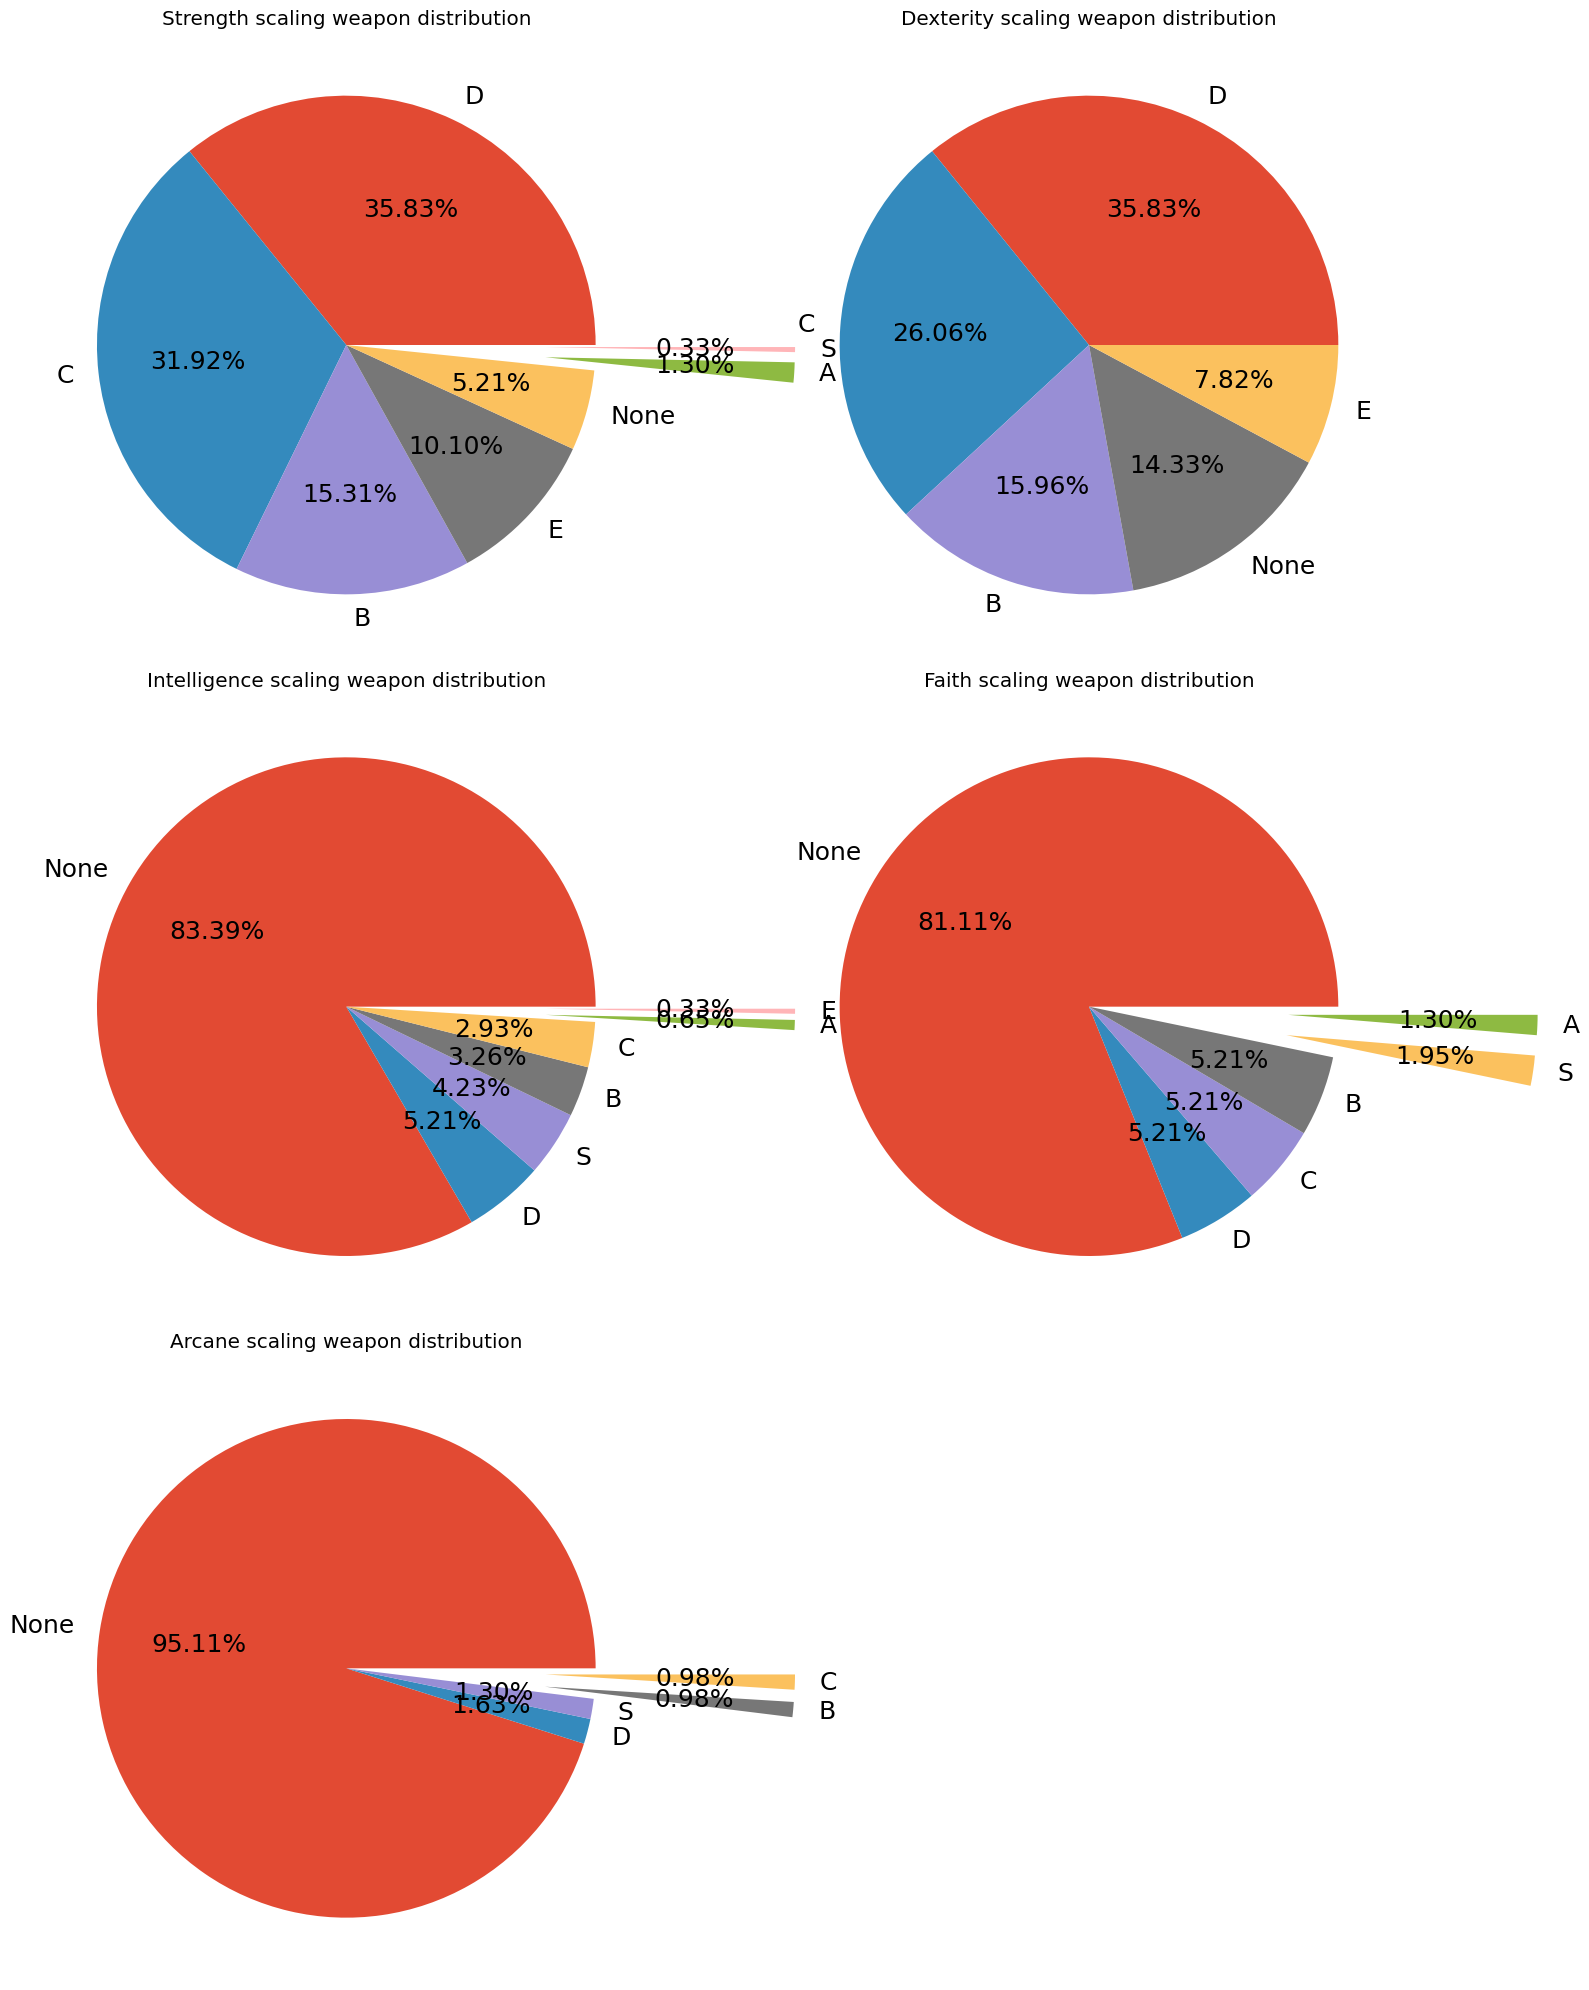

In [52]:
fig,axs=plt.subplots(ncols=2,nrows=3,figsize=(15,20))
plt.style.use("ggplot")
axs[0,0].pie(x=df["Str"].value_counts(),labels=df["Str"].value_counts().index,autopct="%.2f%%",explode=[0]*5+[.8]*2,textprops={"fontsize":18})
axs[0,0].set_title("Strength scaling weapon distribution")

axs[0,1].pie(x=df["Dex"].value_counts(),labels=df["Dex"].value_counts().index,autopct="%.2f%%",textprops={"fontsize":18})
axs[0,1].set_title("Dexterity scaling weapon distribution")

axs[1,0].pie(x=df["Int"].value_counts(),labels=df["Int"].value_counts().index,autopct="%.2f%%",explode=[0]*5+[.8]*2,textprops={"fontsize":18})
axs[1,0].set_title("Intelligence scaling weapon distribution")

axs[1,1].pie(x=df["Fai"].value_counts(),labels=df["Fai"].value_counts().index,autopct="%.2f%%",explode=[0]*4+[.8]*2,textprops={"fontsize":18})
axs[1,1].set_title("Faith scaling weapon distribution")

axs[2,0].pie(x=df["Arc"].value_counts(),labels=df["Arc"].value_counts().index,autopct="%.2f%%",explode=[0]*3+[.8]*2,textprops={"fontsize":18})
axs[2,0].set_title("Arcane scaling weapon distribution")

axs[2,1].remove()

plt.tight_layout()
plt.show()

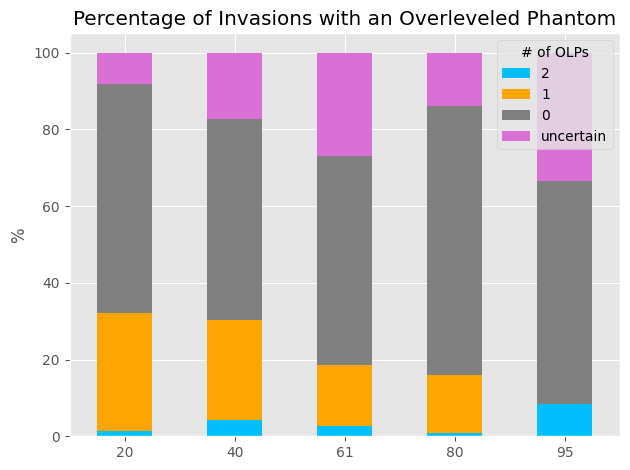

In [53]:
# Example data
df1 = pd.DataFrame({
    '20': [1.4, 30.6, 59.7, 8.3],
    '40': [4.3, 26.1, 52.2, 17.4],
    '61': [2.6, 16, 54.5, 26.9],
    '80': [0.9, 15, 70.1, 14],
    '95': [8.3, 0, 58.3, 33.3],
}, index=['2', '1', '0', 'uncertain'])

df1 = df1.T  # Transpose so categories are rows

df1.plot(kind='bar', stacked=True, color=["deepskyblue", "orange", "gray", "orchid"])
plt.ylabel('%')
plt.title('Percentage of Invasions with an Overleveled Phantom')
plt.legend(title='# of OLPs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

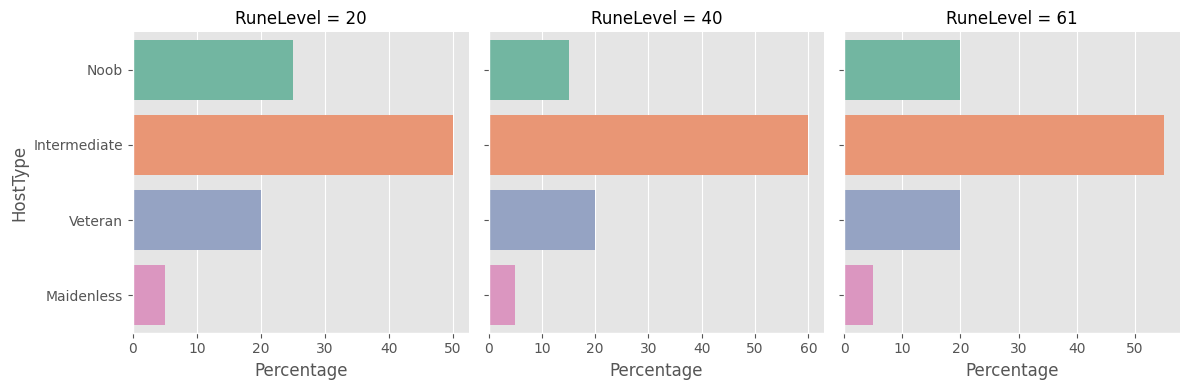

In [54]:

# Example dataset format
data = pd.DataFrame({
    'RuneLevel': [20, 20, 20, 20, 40, 40, 40, 40, 61, 61, 61, 61],
    'HostType': ['Noob', 'Intermediate', 'Veteran', 'Maidenless'] * 3,
    'Percentage': [25, 50, 20, 5, 15, 60, 20, 5, 20, 55, 20, 5]
})

# Create facet grid
g = sns.FacetGrid(data, col="RuneLevel", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.barplot, x="Percentage", hue="HostType", y="HostType", palette="Set2", dodge=False)

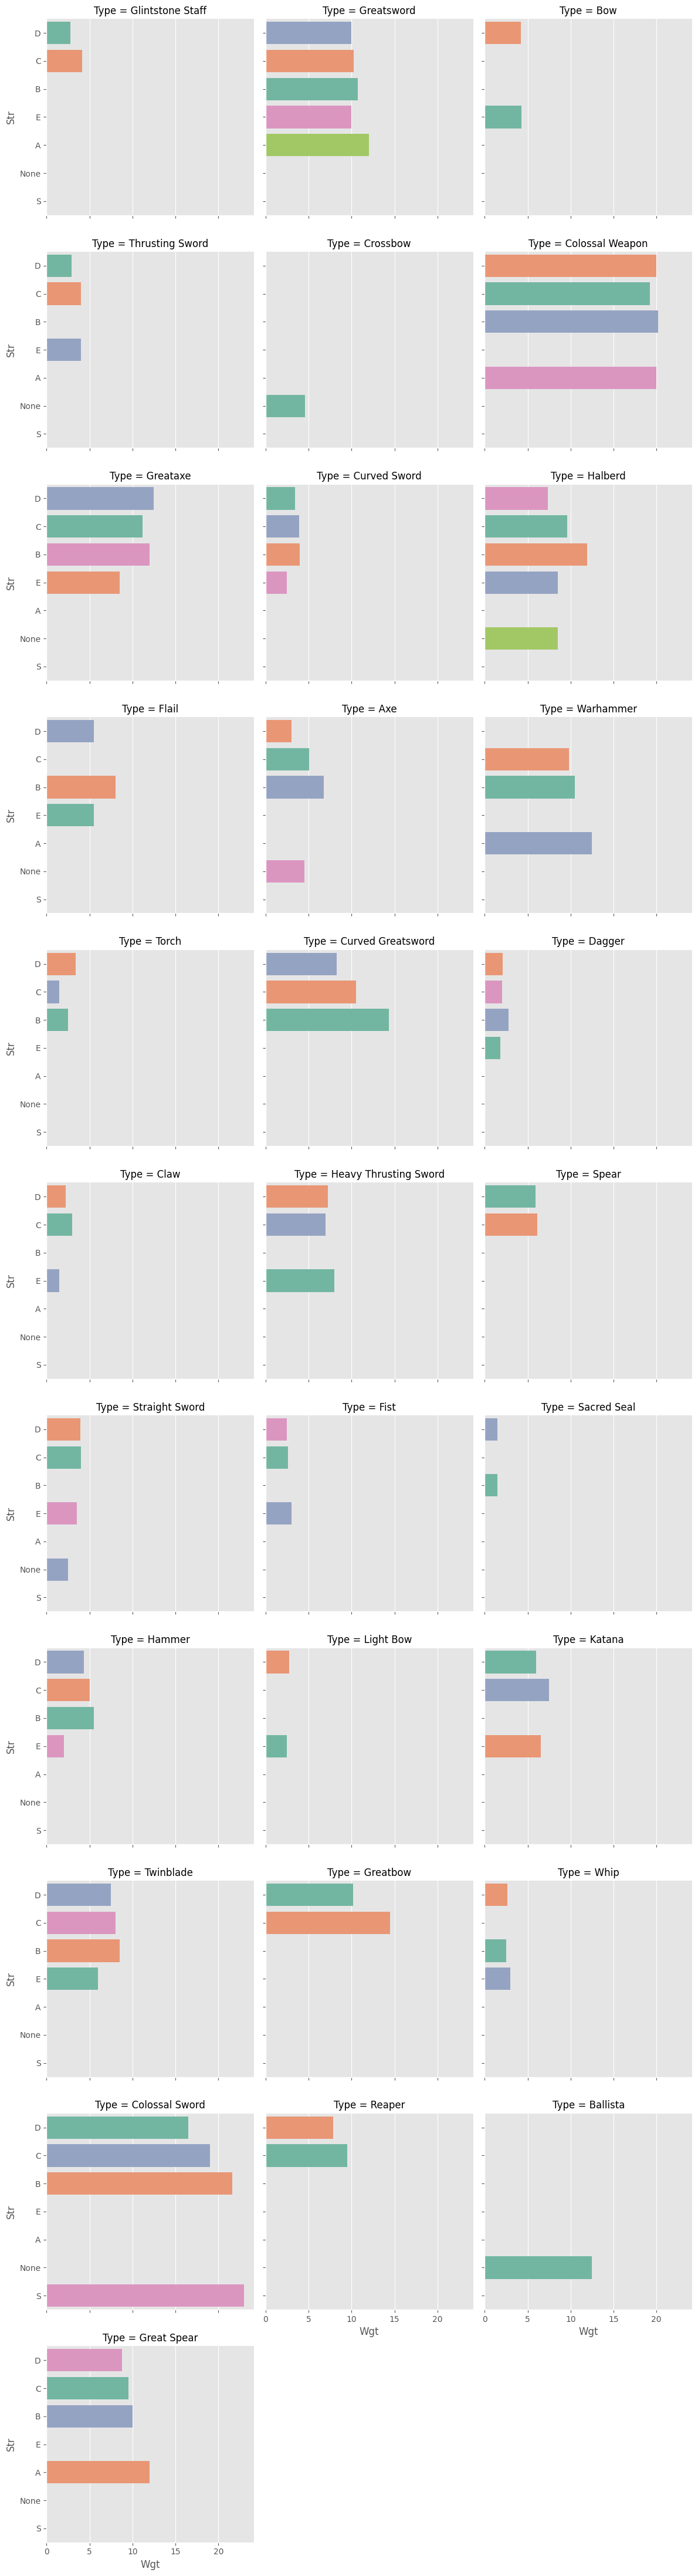

In [70]:
g=sns.FacetGrid(df,col="Type",col_wrap=3,height=4,sharex=True)
g.map_dataframe(sns.barplot,x="Wgt",hue="Str",y="Str",errorbar=('ci', False),dodge=False, palette="Set2")
plt.show()

In [56]:
df

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,0,0,0,0,100,40,D,None,S,None,None,0,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,0,0,0,100,126,B,D,D,None,None,0,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,0,0,0,0,100,60,E,D,None,None,None,0,0,0,0,0,0,0,0,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,0,0,0,0,100,38,D,None,B,None,S,0,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,0,0,0,0,100,62,D,C,None,None,None,55,47,31,31,31,31,25,10,3.0,Smithing Stones
5,Arbalest,Crossbow,308,0,0,0,0,100,68,None,None,None,None,None,0,0,0,0,0,0,0,0,6.0,Smithing Stones
6,Astrologer's Staff,Glintstone Staff,43,0,0,0,0,100,40,D,None,S,None,None,0,25,15,15,15,15,15,10,3.0,Smithing Stones
7,Axe of Godfrey,Colossal Weapon,404,0,0,0,0,100,150,C,D,None,None,None,0,75,45,45,45,45,50,25,18.0,Somber Smithing Stones
8,Axe of Godrick,Greataxe,347,0,0,0,0,100,150,C,C,None,None,None,0,65,35,35,35,35,42,20,11.0,Somber Smithing Stones
9,Azur's Glintstone Staff,Glintstone Staff,58,0,0,0,0,100,42,C,None,S,None,None,0,25,15,15,15,15,15,10,4.0,Somber Smithing Stones
